In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Get Strom Events Data from 2010 to 2019 from National Centers for Environmental Information (NCEI)

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2010_c20191116.csv.gz StormEvents_2010.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz
!mv StormEvents_details-ftp_v1.0_d2011_c20180718.csv.gz StormEvents_2011.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2012_c20200317.csv.gz
!mv StormEvents_details-ftp_v1.0_d2012_c20200317.csv.gz StormEvents_2012.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz
!mv StormEvents_details-ftp_v1.0_d2013_c20170519.csv.gz StormEvents_2013.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2014_c20191116.csv.gz StormEvents_2014.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz
!mv StormEvents_details-ftp_v1.0_d2015_c20191116.csv.gz StormEvents_2015.csv.gz
    
!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz    
!mv StormEvents_details-ftp_v1.0_d2016_c20190817.csv.gz StormEvents_2016.csv.gz 

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2017_c20200121.csv.gz
!mv StormEvents_details-ftp_v1.0_d2017_c20200121.csv.gz StormEvents_2017.csv.gz  

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2018_c20200317.csv.gz
!mv StormEvents_details-ftp_v1.0_d2018_c20200317.csv.gz StormEvents_2018.csv.gz

!wget https://www1.ncdc.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d2019_c20200317.csv.gz
!mv StormEvents_details-ftp_v1.0_d2019_c20200317.csv.gz StormEvents_2019.csv.gz       


In [2]:
# columns of interest from the yearly Storm Events Datasets

selected_columns = ['STATE', 'STATE_FIPS','YEAR', 'MONTH_NAME',
                    'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
                    'WFO', 'BEGIN_DATE_TIME', 'END_DATE_TIME',
                    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 
                    'DEATHS_DIRECT','DEATHS_INDIRECT', 
                    'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
                    'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE',
                    'TOR_F_SCALE','TOR_LENGTH', 'TOR_WIDTH', 
                    'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
                    'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 
                    'BEGIN_LOCATION', 'END_LOCATION',
                    'BEGIN_RANGE', 'END_RANGE','BEGIN_AZIMUTH',
                    'END_AZIMUTH','BEGIN_LAT',
                    'BEGIN_LON', 'END_LAT', 'END_LON']

In [3]:
# read and concatenate yearly Storm Events Datasets into a single data frame 

df = pd.read_csv('StormEvents_2010.csv.gz', compression = 'gzip')[selected_columns]

for i in range(1,10):
    df_temp = pd.read_csv('StormEvents_' + str(2010 + i) + '.csv.gz', compression = 'gzip')
    df = pd.concat([df, df_temp[selected_columns]])
   

In [4]:
df.shape

(626677, 38)

In [5]:
df.head()

,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,...,BEGIN_LOCATION,END_LOCATION,BEGIN_RANGE,END_RANGE,BEGIN_AZIMUTH,END_AZIMUTH,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON
0,NEW HAMPSHIRE,33,2010,July,Heat,Z,12,EASTERN HILLSBOROUGH,BOX,07-JUL-10 12:51:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW HAMPSHIRE,33,2010,January,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,17-JAN-10 23:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NEW HAMPSHIRE,33,2010,October,Strong Wind,Z,12,EASTERN HILLSBOROUGH,BOX,01-OCT-10 08:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NEW HAMPSHIRE,33,2010,July,Heat,Z,12,EASTERN HILLSBOROUGH,BOX,06-JUL-10 09:51:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NEW HAMPSHIRE,33,2010,December,Winter Storm,Z,12,EASTERN HILLSBOROUGH,BOX,26-DEC-10 17:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# number of distinct event types
print("There are {} storm event types.".format(len(df['EVENT_TYPE'].unique())))

There are 56 storm event types.


## Event type

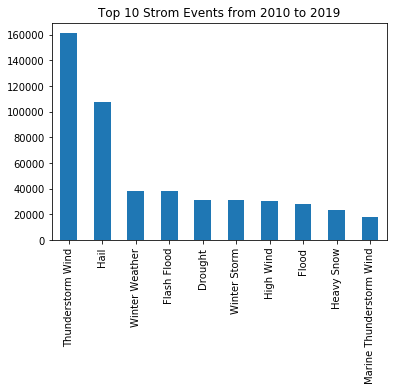

In [7]:
df['EVENT_TYPE'].value_counts()[0:10]\
.plot(kind = 'bar', title ='Top 10 Strom Events from 2010 to 2019')

## Fatalities

In [8]:
def fatality(col_name):
    """ Returns direct, indirect, and total fatalities grouped by col_name. """
    
    df_fatality = df.groupby(col_name).sum()[['DEATHS_DIRECT','DEATHS_INDIRECT']]
    df_fatality['DEATHS_TOTAL'] = df_fatality['DEATHS_DIRECT'] \
                                 + df_fatality['DEATHS_INDIRECT']
    
    return df_fatality    

### Total fatalities by event type

In [9]:
df_fatality_event = fatality('EVENT_TYPE').sort_values('DEATHS_TOTAL', ascending = False)

In [10]:
df_fatality_event.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
EVENT_TYPE,,,
Tornado,908,26,934
Excessive Heat,635,129,764
Heat,552,194,746
Flash Flood,691,41,732
Winter Weather,56,498,554


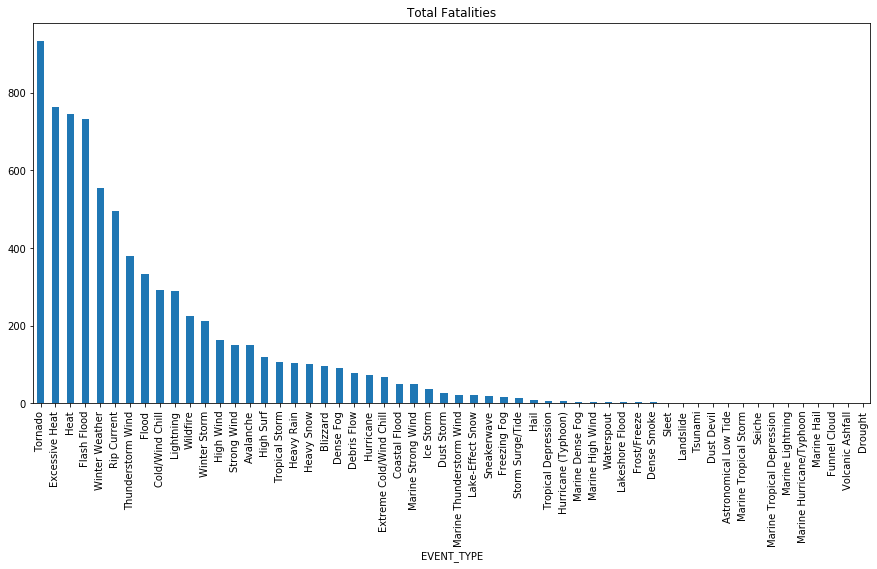

In [11]:
df_fatality_event['DEATHS_TOTAL'] \
.plot(kind = 'bar', title = 'Total Fatalities', figsize = (15,7))

### Total fatalities by state

In [12]:
df_fatality_state = fatality('STATE').sort_values('DEATHS_TOTAL', ascending = False)

In [13]:
df_fatality_state.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
STATE,,,
TEXAS,467,178,645
NEVADA,359,173,532
CALIFORNIA,342,92,434
FLORIDA,281,140,421
ALABAMA,359,36,395


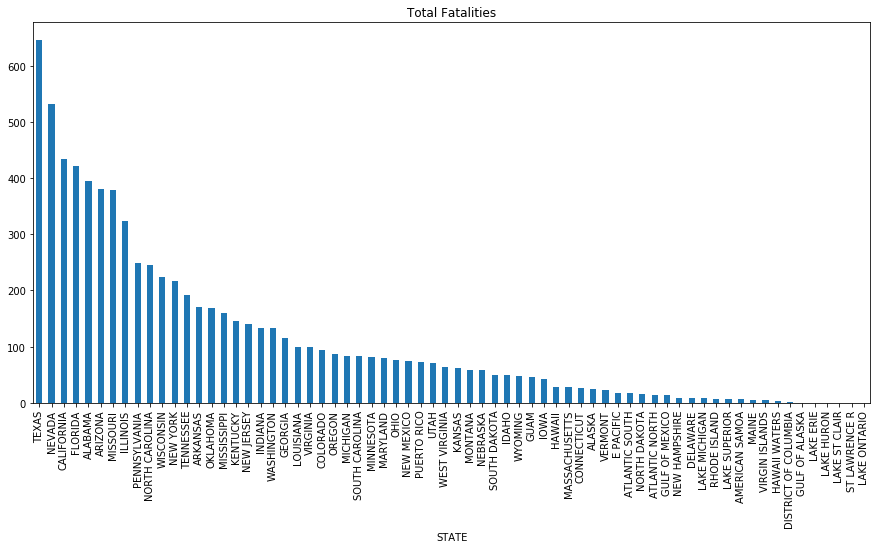

In [14]:
df_fatality_state['DEATHS_TOTAL'] \
.plot(kind = 'bar', title = 'Total Fatalities', figsize = (15,7))

### Total fatalities by year

In [15]:
df_fatality_year = fatality('YEAR').sort_values('DEATHS_TOTAL', ascending = False)

In [16]:
df_fatality_year.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
YEAR,,,
2011,1096,240,1336
2018,728,315,1043
2017,491,230,721
2012,537,170,707
2015,536,165,701


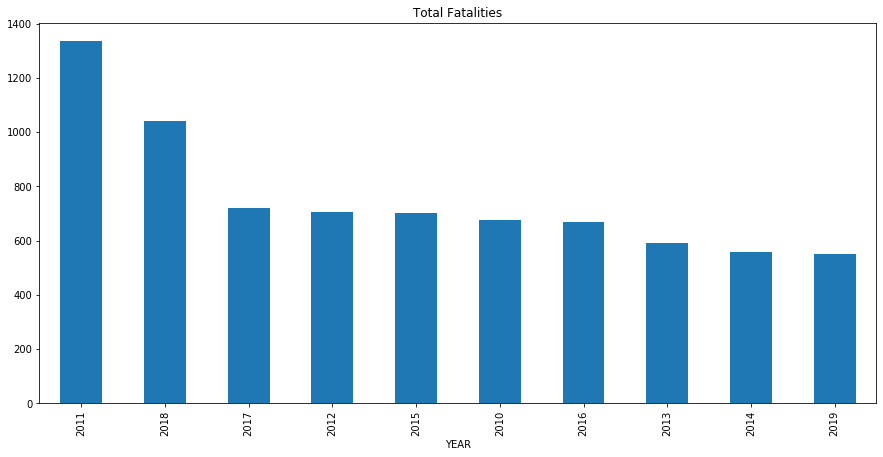

In [17]:
df_fatality_year['DEATHS_TOTAL'] \
.plot(kind = 'bar', title = 'Total Fatalities', figsize = (15,7))

## Direct fatalities by event type

In [18]:
df_fatalityD_event = fatality('EVENT_TYPE').sort_values('DEATHS_DIRECT', ascending = False)

In [19]:
df_fatalityD_event.head()

,DEATHS_DIRECT,DEATHS_INDIRECT,DEATHS_TOTAL
EVENT_TYPE,,,
Tornado,908,26,934
Flash Flood,691,41,732
Excessive Heat,635,129,764
Heat,552,194,746
Rip Current,489,7,496


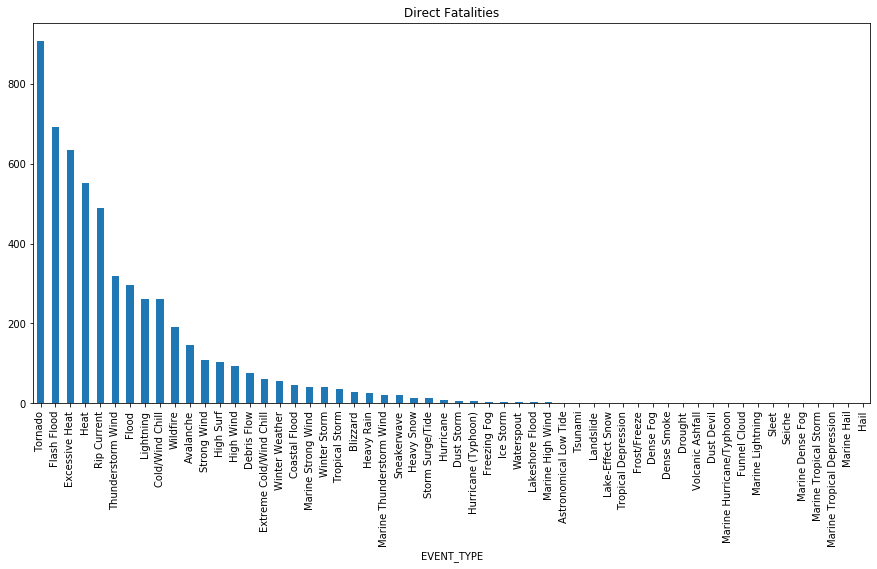

In [20]:
df_fatalityD_event['DEATHS_DIRECT'] \
.plot(kind = 'bar', title = 'Direct Fatalities', figsize = (15,7))

In [21]:
top5_events = ['Tornado', 'Flash Flood', 'Excessive Heat', 'Heat', 'Rip Current']

## Yearly direct fatalities by tornados

YEAR
2010     45
2011    553
2012     69
2013     55
2014     47
2015     36
2016     18
2017     35
2018     10
2019     40
Name: DEATHS_DIRECT, dtype: int64


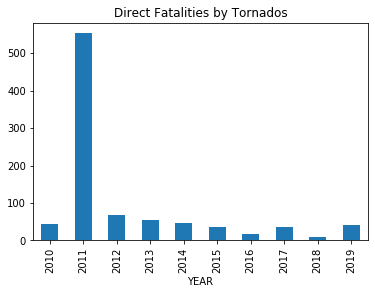

In [22]:
df_tornados = df[df['EVENT_TYPE'] == 'Tornado'].groupby('YEAR').sum()['DEATHS_DIRECT']
print(df_tornados)
df_tornados.plot(kind='bar', logy = False, title = 'Direct Fatalities by Tornados')

## Top 5 direct fatalities by year

In [23]:
df_yearly_deaths = df[df['EVENT_TYPE'] == 'Tornado'].groupby('YEAR').sum()['DEATHS_DIRECT']

for event in top5_events[1:]:
    df_yearly_temp = df[df['EVENT_TYPE'] == event].groupby('YEAR').sum()['DEATHS_DIRECT']
    df_yearly_deaths = pd.concat([df_yearly_deaths, df_yearly_temp], axis=1)

df_yearly_deaths.columns = top5_events # rename the columns

In [24]:
df_yearly_deaths

,Tornado,Flash Flood,Excessive Heat,Heat,Rip Current
YEAR,,,,,
2010,45,67,74,64,47
2011,553,69,127,79,30
2012,69,18,91,65,38
2013,55,60,50,42,53
2014,47,31,5,15,47
2015,36,142,12,33,46
2016,18,86,50,44,49
2017,35,123,54,53,63
2018,10,54,156,125,59


In [25]:
df_yearly_deaths.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tornado,10.0,90.8,163.274683,10.0,35.25,42.5,53.00,553.0
Flash Flood,10.0,69.1,38.977059,18.0,44.25,63.5,81.75,142.0
Excessive Heat,10.0,63.5,49.710830,5.0,24.50,52.0,86.75,156.0
Heat,10.0,55.2,30.846574,15.0,35.25,48.5,64.75,125.0
Rip Current,10.0,48.9,9.859570,30.0,46.25,48.0,56.00,63.0


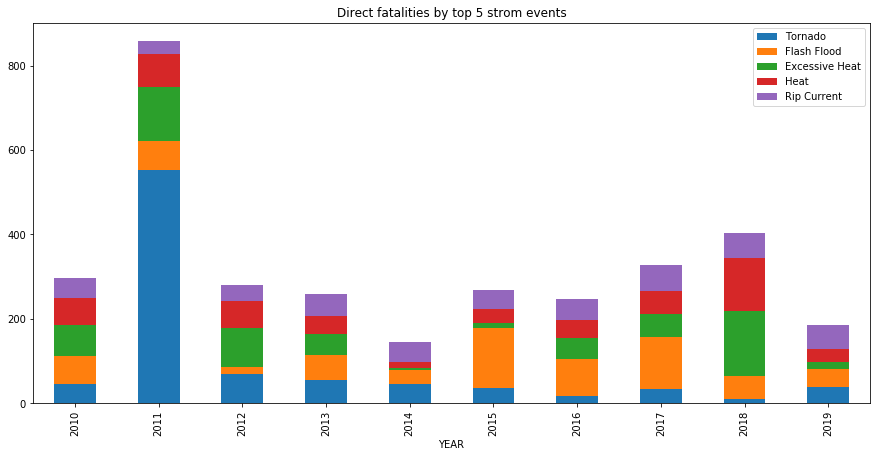

In [46]:
df_yearly_deaths.plot(kind = 'bar',
                      stacked = True,
                      logy = False, title = 'Direct fatalities by top 5 strom events', 
                      figsize = (15,7))

## Property Damage

In [27]:
df_damage = df[['STATE','EVENT_TYPE','YEAR','MONTH_NAME','DAMAGE_PROPERTY']].dropna()

In [28]:
df_damage.shape

(513677, 5)

In [29]:
df_damage.head()

,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY
0,NEW HAMPSHIRE,Heat,2010,July,0.00K
1,NEW HAMPSHIRE,Heavy Snow,2010,January,0.00K
2,NEW HAMPSHIRE,Strong Wind,2010,October,50.00K
3,NEW HAMPSHIRE,Heat,2010,July,0.00K
4,NEW HAMPSHIRE,Winter Storm,2010,December,0.00K


In [30]:
df_damage_1 = df_damage[df_damage['DAMAGE_PROPERTY'].str.contains('K|M|B')== True].copy()

In [31]:
# check if any DAMAGE_PROPERTY values are without K, M, or B
df_damage[df_damage['DAMAGE_PROPERTY'].str.contains('K|M|B')== False]

,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY
70113,MICHIGAN,Flash Flood,2011,July,0.00


In [32]:
df_damage_1.head()

,STATE,EVENT_TYPE,YEAR,MONTH_NAME,DAMAGE_PROPERTY
0,NEW HAMPSHIRE,Heat,2010,July,0.00K
1,NEW HAMPSHIRE,Heavy Snow,2010,January,0.00K
2,NEW HAMPSHIRE,Strong Wind,2010,October,50.00K
3,NEW HAMPSHIRE,Heat,2010,July,0.00K
4,NEW HAMPSHIRE,Winter Storm,2010,December,0.00K


In [33]:
# Create a numeric column for DAMAGE_PROPERTY in million. 
dict_1 ={'K':0.001, 'M':1, 'B':1000}

df_damage_1['DAMAGE_PROPERTY_million'] = df_damage_1['DAMAGE_PROPERTY']\
                                        .transform(lambda x: float(x[:-1]) * dict_1[x[-1]])

## Property damage by event type

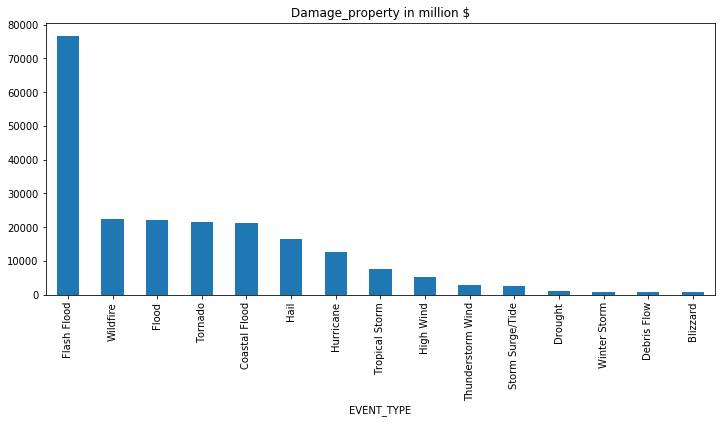

In [34]:
df_damage_1.groupby('EVENT_TYPE')\
.sum()['DAMAGE_PROPERTY_million']\
.sort_values(ascending = False)[:15]\
.plot(kind = 'bar', figsize = (12,5), title = 'Damage_property in million $')


In [35]:
# top 5 damage events
top5_damage = ['Flash Flood', 'Wildfire', 'Flood', 'Tornado', 'Coastal Flood']

## Property damage by state

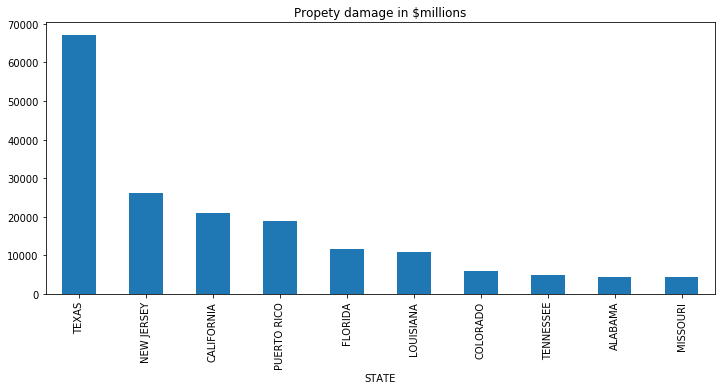

In [36]:
df_damage_1.groupby('STATE')\
.sum()['DAMAGE_PROPERTY_million']\
.sort_values(ascending = False)[:10]\
.plot(kind = 'bar', y = 'Y', figsize = (12,5), title = 'Propety damage in $millions')

## Property damage by month

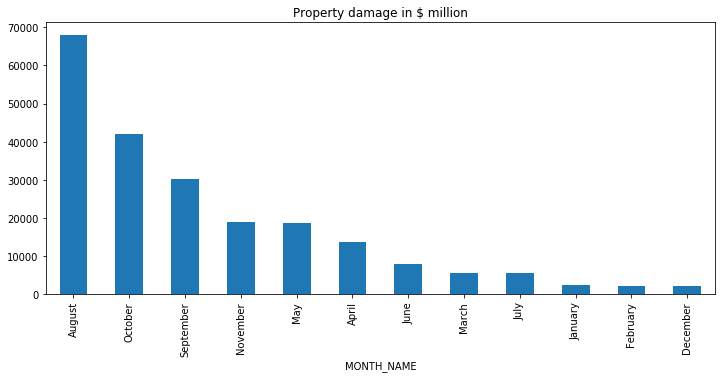

In [37]:
df_damage_1.groupby('MONTH_NAME')\
.sum()['DAMAGE_PROPERTY_million']\
.sort_values(ascending = False)\
.plot(kind = 'bar', figsize = (12,5), title = 'Property damage in $ million')

## Top 5 property damage by year

In [38]:
# yearly distribution of top 5 property damage

df_yearly_damage = df_damage_1[df_damage_1['EVENT_TYPE'] == 'Flash Flood']\
                   .groupby('YEAR')\
                   .sum()['DAMAGE_PROPERTY_million']

for event in top5_damage[1:]:
    df_yearly_temp = df_damage_1[df_damage_1['EVENT_TYPE'] == event]\
                     .groupby('YEAR')\
                     .sum()['DAMAGE_PROPERTY_million']
    df_yearly_damage = pd.concat([df_yearly_damage, df_yearly_temp], axis=1)

df_yearly_damage.columns = top5_damage # rename the columns

In [39]:
df_yearly_damage

,Flash Flood,Wildfire,Flood,Tornado,Coastal Flood
YEAR,,,,,
2010,833.80040,244.88967,3093.91854,1136.92045,7.7450
2011,1356.24670,667.21740,6621.68595,9684.15070,27.2740
2012,379.16150,1460.08730,119.05130,1648.69650,21049.5488
2013,957.03283,355.80930,1215.71020,3642.16775,23.9435
2014,2476.86760,323.81146,148.98499,622.07000,3.3865
2015,1833.83237,22.89700,686.59510,317.88110,14.3935
2016,3645.40207,181.50101,7066.26598,181.17620,0.7235
2017,63118.68526,155.96450,1527.37730,633.77220,6.3105
2018,683.10386,18842.00800,520.45062,670.25390,14.1650


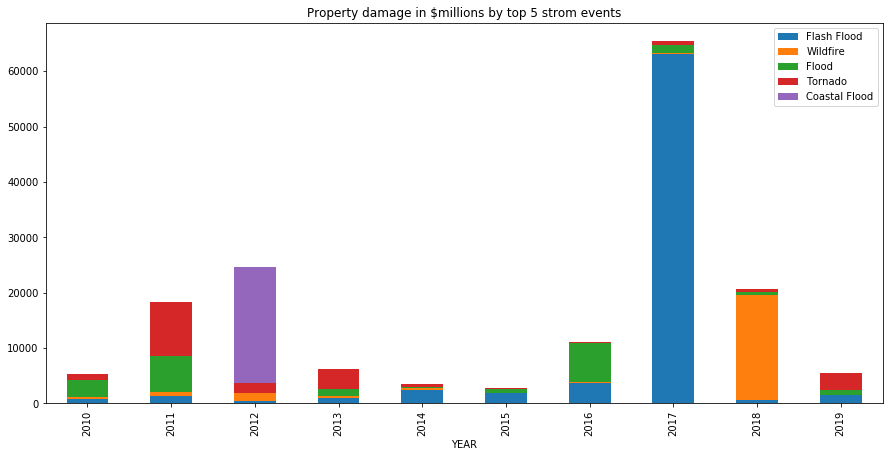

In [44]:
df_yearly_damage.plot(kind = 'bar',
                      stacked = True,
                      logy = False, 
                      title = 'Property damage in $millions by top 5 strom events', 
                      figsize = (15,7))